<a href="https://colab.research.google.com/github/gajanankumar/Classification_Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description**

**The main goal of the project is to predict the risk of Coronary Heart Disease (CHD) given a set of features. The prediction can be of 2 types, Yes or No.**

**In this project, we will be working on predicting 10 year risk of Coronary Heart Disease (CHD). We are given a set of variables which impact heart diseases. These variables are related to  demographic, past and current medical history.**

**Encourage people to get special check-ups to identify if they are at the risk of heart diseases. Heart diseases have unfortunately become very common. It may be due to various reasons such as lifestyle, work pressure, lack of exercise.**

## Data Description

### This data holds 3390 rows and 17 columns, which have been explained below.

## Dataset Information
Demographic:

• Sex- male or female("M" or "F") 

• Age- Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

Behavioral: 

• is_smoking- whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day- the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

Medical( history)

• BP Meds-whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke- whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp-whether or not the patient was hypertensive (Nominal) 

• Diabetes- whether or not the patient had diabetes (Nominal) 

Medical(current):

• Tot Chol- total cholesterol level (Continuous) 

• Sys BP- systolic blood pressure (Continuous) 

• Dia BP- diastolic blood pressure (Continuous) 

• BMI- Body Mass Index (Continuous) 

• Heart Rate- heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose- glucose level (Continuous) 

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



###**Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_chd=pd.read_csv('/content/drive/MyDrive/mlprojects/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv')

###**Dataset Inspection**

In [ ]:
df_chd.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df_chd.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df_chd.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df_chd.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df_chd.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
#checking null values
df_chd.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#checking null values
df_chd.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#Checking Duplicate records in dataset
df_chd.duplicated().sum()

0

###Data Cleaning

In [ ]:
df_chd['education']

0       2.0
1       4.0
2       1.0
3       1.0
4       1.0
       ... 
3385    1.0
3386    1.0
3387    3.0
3388    1.0
3389    3.0
Name: education, Length: 3390, dtype: float64

In [ ]:
df_chd['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
df_chd['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [ ]:
num_feats=df_chd.describe()
num_feats=num_feats.columns.to_list()

In [ ]:
num_feats

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
df_chd['education']=df_chd['education'].astype('object')

In [ ]:
df_chd['education'].dtype

dtype('O')

Here education feature found as categorical numerical datatype,so we can convert to object for eda puropse only.

In [ ]:
for x in num_feats:
  value_counts=df_chd[x].value_counts()
  print("{} value_counts:{}".format(x,value_counts))
  print("*"*100)
  

id value_counts:0       1
2277    1
2253    1
2254    1
2255    1
       ..
1133    1
1134    1
1135    1
1136    1
3389    1
Name: id, Length: 3390, dtype: int64
****************************************************************************************************
age value_counts:40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64
****************************************************************************************************
education value_counts:1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
****************************************************************************************************
ci

From above observations, we conclude that here features BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes', are numerical categorical, so we convert them to Object datatype for eda purpose only

In [ ]:
def num_to_obj(feat):
  print("Before conversion dtype of {}:{}".format(feat,df_chd[feat].dtype))
  df_chd[feat]=df_chd[feat].astype('object')
  print("After conversion dtype of {}:{}".format(feat,df_chd[feat].dtype))

In [ ]:
num_catv=['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
num_catv

['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
for f in num_catv:
  ob=num_to_obj(f)

Before conversion dtype of BPMeds:float64
After conversion dtype of BPMeds:object
Before conversion dtype of prevalentStroke:int64
After conversion dtype of prevalentStroke:object
Before conversion dtype of prevalentHyp:int64
After conversion dtype of prevalentHyp:object
Before conversion dtype of diabetes:int64
After conversion dtype of diabetes:object
Before conversion dtype of TenYearCHD:int64
After conversion dtype of TenYearCHD:object


In [ ]:
num_feats=df_chd.describe()
num_feats=num_feats.columns.to_list()

In [ ]:
num_feats

['id',
 'age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
cat_feats=[feat for feat in  df_chd.columns if feat not in num_feats]
cat_feats

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [ ]:
num_feats

['id',
 'age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
for x in cat_feats:
  value_counts=df_chd[x].value_counts()
  uniques=df_chd[x].unique()
  print("{} value_counts:{}".format(x,value_counts))
  print()
  print("{} Uniques:{}".format(x,uniques))
  print()

education value_counts:1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

education Uniques:[2.0 4.0 1.0 3.0 nan]

sex value_counts:F    1923
M    1467
Name: sex, dtype: int64

sex Uniques:['F' 'M']

is_smoking value_counts:NO     1703
YES    1687
Name: is_smoking, dtype: int64

is_smoking Uniques:['YES' 'NO']

BPMeds value_counts:0.0    3246
1.0     100
Name: BPMeds, dtype: int64

BPMeds Uniques:[0.0 nan 1.0]

prevalentStroke value_counts:0    3368
1      22
Name: prevalentStroke, dtype: int64

prevalentStroke Uniques:[0 1]

prevalentHyp value_counts:0    2321
1    1069
Name: prevalentHyp, dtype: int64

prevalentHyp Uniques:[0 1]

diabetes value_counts:0    3303
1      87
Name: diabetes, dtype: int64

diabetes Uniques:[0 1]

TenYearCHD value_counts:0    2879
1     511
Name: TenYearCHD, dtype: int64

TenYearCHD Uniques:[1 0]



###Checking Missing value counts

In [ ]:
for x in num_feats:
  value_counts=df_chd[x].isna().sum()
  print("{} nan values :{}".format(x,value_counts))
  print("*"*100)

id nan values :0
****************************************************************************************************
age nan values :0
****************************************************************************************************
cigsPerDay nan values :22
****************************************************************************************************
totChol nan values :38
****************************************************************************************************
sysBP nan values :0
****************************************************************************************************
diaBP nan values :0
****************************************************************************************************
BMI nan values :14
****************************************************************************************************
heartRate nan values :1
****************************************************************************************************
glucose nan values :304
*

In [ ]:
for x in cat_feats:
  value_counts=df_chd[x].isna().sum()
  print("{} nan values :{}".format(x,value_counts))
  print("*"*100)

education nan values :87
****************************************************************************************************
sex nan values :0
****************************************************************************************************
is_smoking nan values :0
****************************************************************************************************
BPMeds nan values :44
****************************************************************************************************
prevalentStroke nan values :0
****************************************************************************************************
prevalentHyp nan values :0
****************************************************************************************************
diabetes nan values :0
****************************************************************************************************
TenYearCHD nan values :0
**************************************************************************************************

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df_chd.columns[df_chd.isnull().any()].tolist()
    print("missing:",missing)
    return missing #returns missing values column list

# Missing data counts and percentage
print('Missing Data Count')
print(df_chd[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_chd[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_chd)*100,3))

Missing Data Count
missing: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
missing: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
glucose       8.968
education     2.566
BPMeds        1.298
totChol       1.121
cigsPerDay    0.649
BMI           0.413
heartRate     0.029
dtype: float64


###Univariate Analysis-Outlier Detection

varid:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


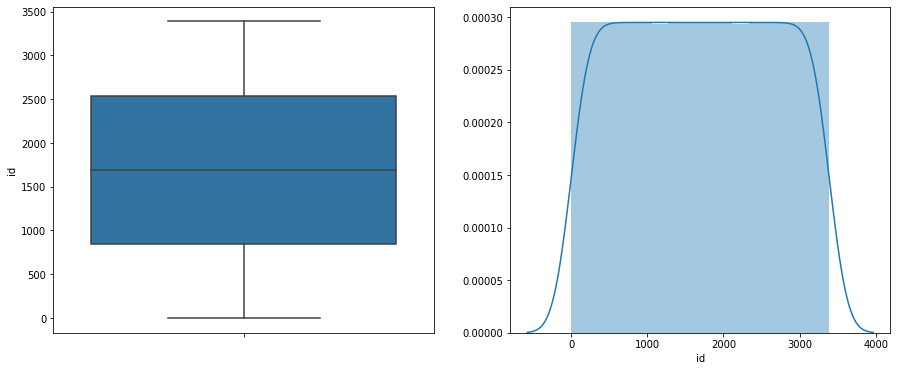

varage:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


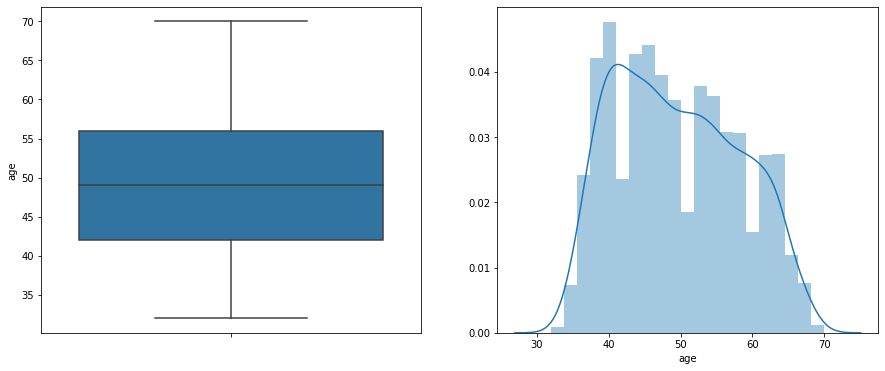

varcigsPerDay:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


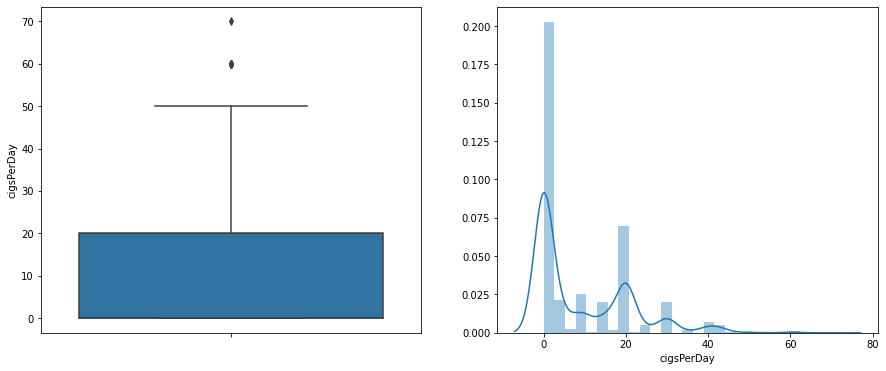

vartotChol:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


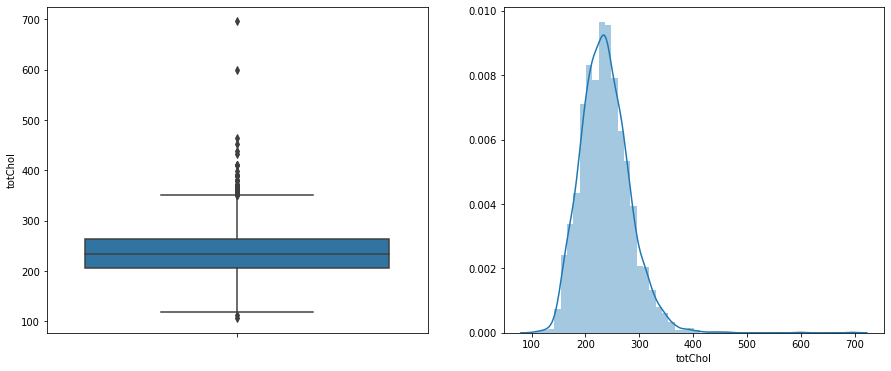

varsysBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


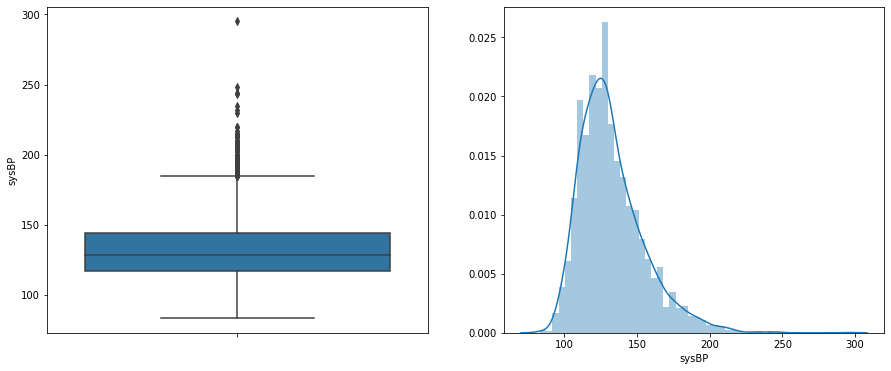

vardiaBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


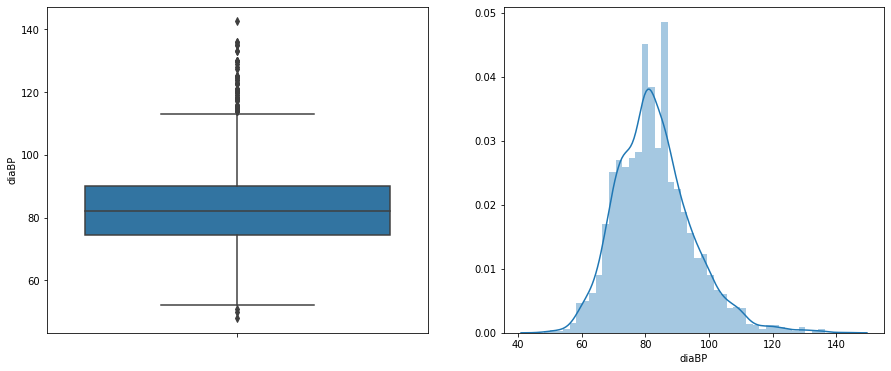

varBMI:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


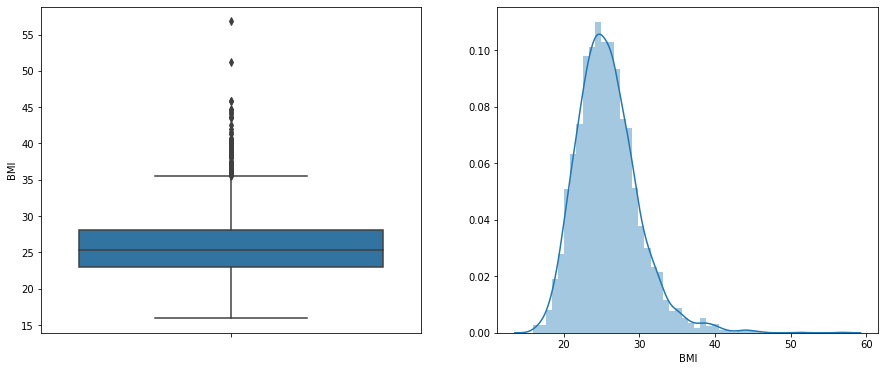

varheartRate:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


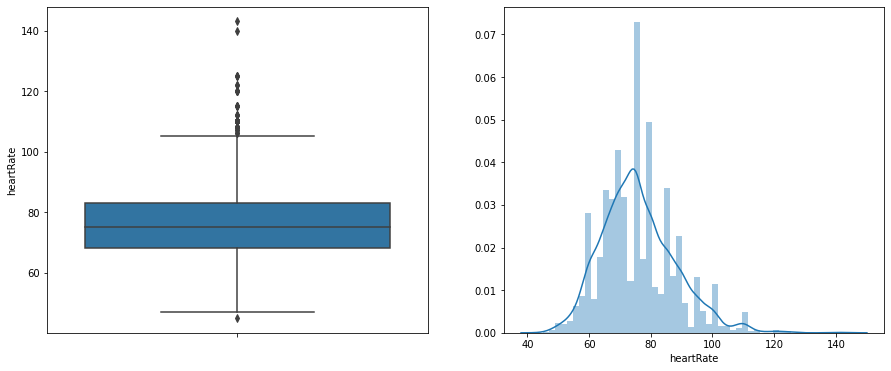

varglucose:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


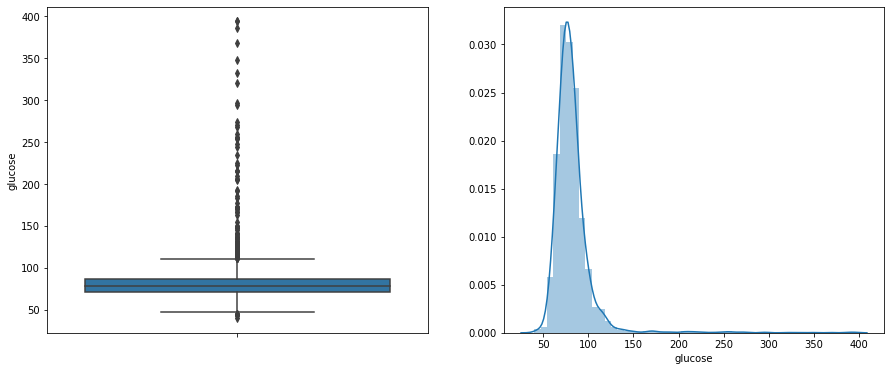

In [ ]:
for var in num_feats:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    print("var{}:{}".format(var,df_chd[var].dtype))
    fig = sns.boxplot(y=df_chd[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_chd[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

From above box plot and dist we conclude that outliers are present in variables
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose and most variables are right skewed.

### Missing values handling

As outliers are present in variables
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose and most variables are right skewed.
 we impute missing values with median for these feature.

In [ ]:

print('Features Missing Before'.format(x))
print(df_chd[num_feats[2:]].isnull().sum())
print('--'*50)


Features Missing Before
cigsPerDay     22
totChol        38
sysBP           0
diaBP           0
BMI            14
heartRate       1
glucose       304
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
print('Check Assumptions')
print(df_chd[(df_chd['cigsPerDay'].isnull())|
                 (df_chd['totChol'].isnull())]
                 [['cigsPerDay','totChol']])

print(df_chd[(df_chd['cigsPerDay'].isnull())|
                 (df_chd['totChol'].isnull())]
                 [['cigsPerDay','totChol']].shape)

Check Assumptions
      cigsPerDay  totChol
10           0.0      NaN
69           0.0      NaN
254          0.0      NaN
290         30.0      NaN
422          NaN    213.0
466          NaN    170.0
469          NaN    196.0
491          NaN    356.0
538          NaN    171.0
554          3.0      NaN
625         30.0      NaN
700          9.0      NaN
732          0.0      NaN
767          NaN    219.0
797          0.0      NaN
808         20.0      NaN
1103        20.0      NaN
1219         0.0      NaN
1234        20.0      NaN
1267        15.0      NaN
1298         8.0      NaN
1347        20.0      NaN
1461         NaN    365.0
1467         NaN    252.0
1493        20.0      NaN
1597         NaN    229.0
1695         0.0      NaN
1753        15.0      NaN
1756         0.0      NaN
1776        40.0      NaN
1780        20.0      NaN
1804        30.0      NaN
1856        40.0      NaN
1986         NaN    233.0
1994         2.0      NaN
2031         NaN    270.0
2087         NaN    

In [ ]:
# Function to impute missing values
def feat_impute(column, value):
      df_chd.loc[df_chd[column].isnull(),column] = value

In [ ]:
for x in num_feats[2:]:
  feat_impute(x,df_chd[x].median())

In [ ]:
print('Features Missing After'.format(x))
print(df_chd[num_feats[2:]].isnull().sum())
print('--'*50)


Features Missing After
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
df_chd.isna().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
df_chd['BPMeds'].mode()[0]

0.0

In [ ]:
df_chd['education'].mode()[0]

1.0

In [ ]:


print('Features Missing Before')
print(df_chd[['education','BPMeds']].isnull().sum())
print('--'*50)


# Confirm that the missing values in these columns are the same rows
print('Check Assumptions')
print(df_chd[(df_chd['education'].isnull())|
                 (df_chd['BPMeds'].isnull())]
                 [['cigsPerDay','BPMeds']])

print(df_chd[(df_chd['education'].isnull())|
                 (df_chd['BPMeds'].isnull())]
                 [['education','BPMeds']].shape)

# Impute MasVnrArea with the most frequent values

df_chd['education'] = df_chd['education'].fillna(df_chd['education'].mode()[0])

# Impute MasVnrType with the most frequent values

df_chd['BPMeds'] = df_chd['BPMeds'].fillna(df_chd['BPMeds'].mode()[0])

print('Features Missing After')
print(df_chd[['education','BPMeds']].isnull().sum())
print('--'*50)

print('Confirm Imputation')
print(df_chd[(df_chd['education'].isnull())|
                 (df_chd['BPMeds'].isnull())]
                 [['education','BPMeds']])

Features Missing Before
education    87
BPMeds       44
dtype: int64
----------------------------------------------------------------------------------------------------
Check Assumptions
      cigsPerDay BPMeds
8           20.0    NaN
49          20.0    0.0
62           0.0    0.0
69           0.0    0.0
102          0.0    NaN
...          ...    ...
3252         9.0    0.0
3281         3.0    NaN
3322        30.0    0.0
3331        20.0    0.0
3388         0.0    NaN

[131 rows x 2 columns]
(131, 2)
Features Missing After
education    0
BPMeds       0
dtype: int64
----------------------------------------------------------------------------------------------------
Confirm Imputation
Empty DataFrame
Columns: [education, BPMeds]
Index: []


In [ ]:
df_chd.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

###Handling Outliers

In [ ]:
#Capping the outlier rows with Percentiles
for x in num_feats[2:]:
  upper_lim = df_chd[x].quantile(.95)
  lower_lim = df_chd[x].quantile(.05)
  df_chd.loc[(df_chd[x] > upper_lim),x] = upper_lim
  df_chd.loc[(df_chd[x] < lower_lim),x] = lower_lim

varid:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


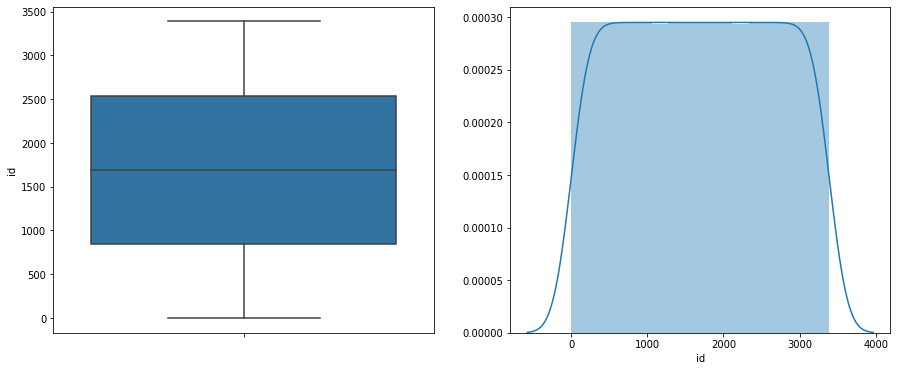

varage:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


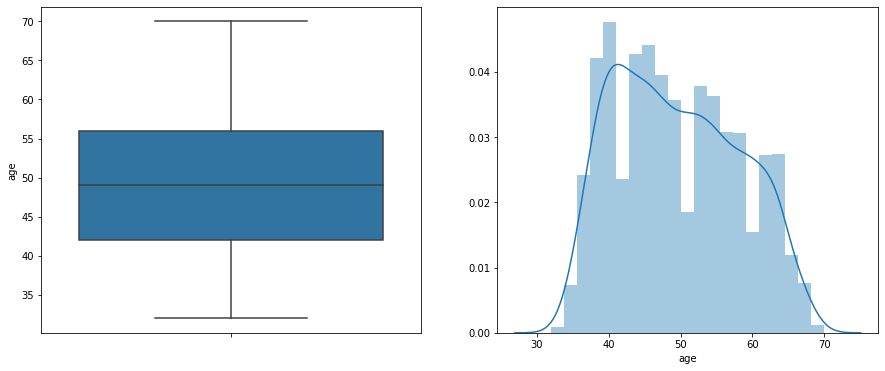

varcigsPerDay:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


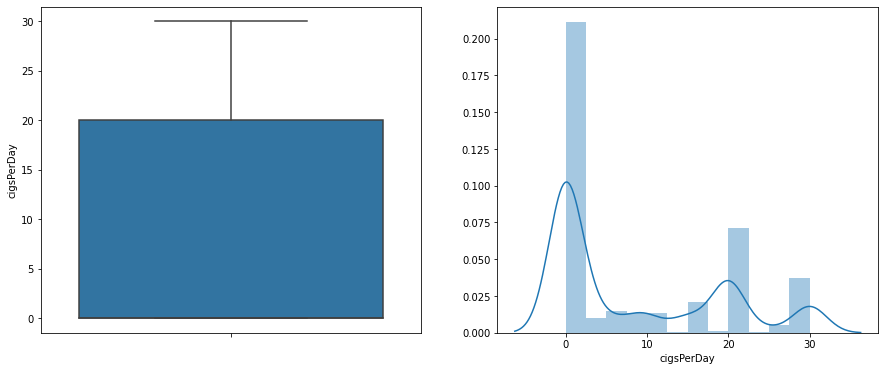

vartotChol:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


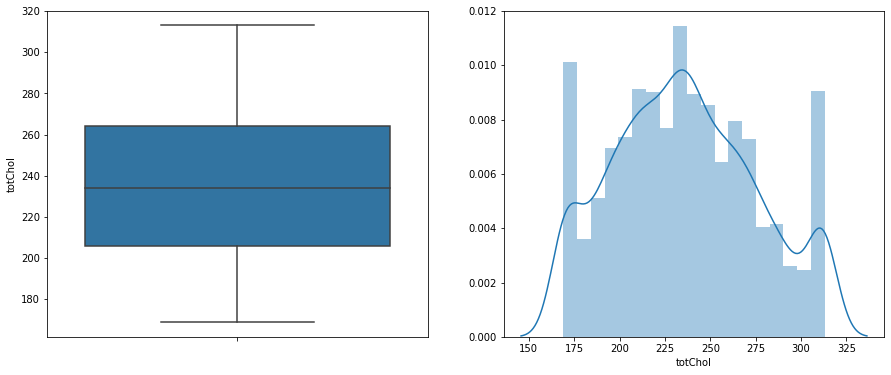

varsysBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


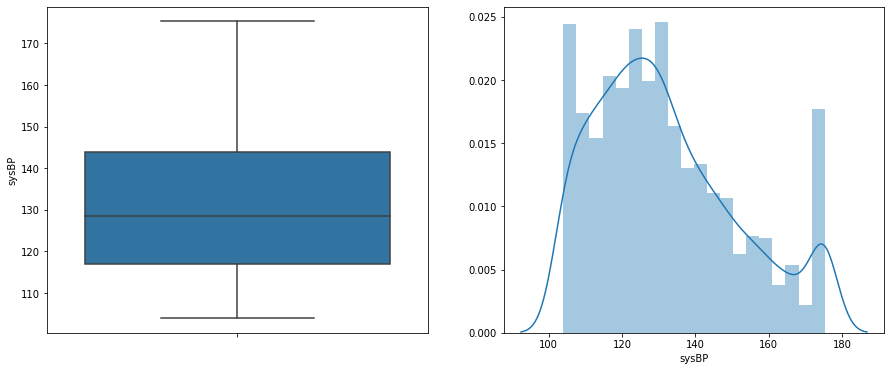

vardiaBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


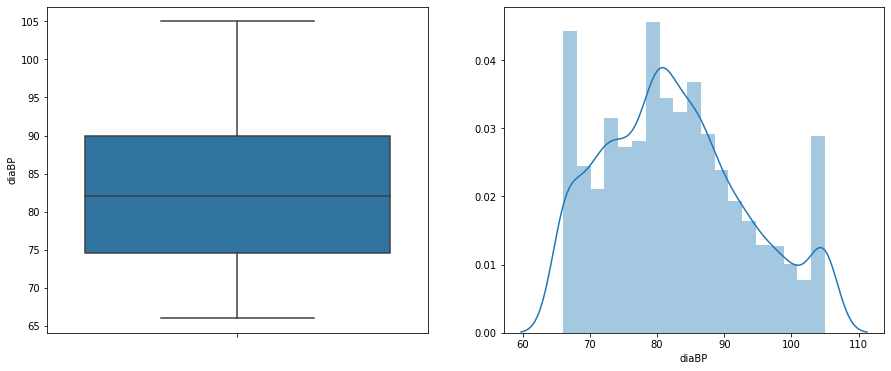

varBMI:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


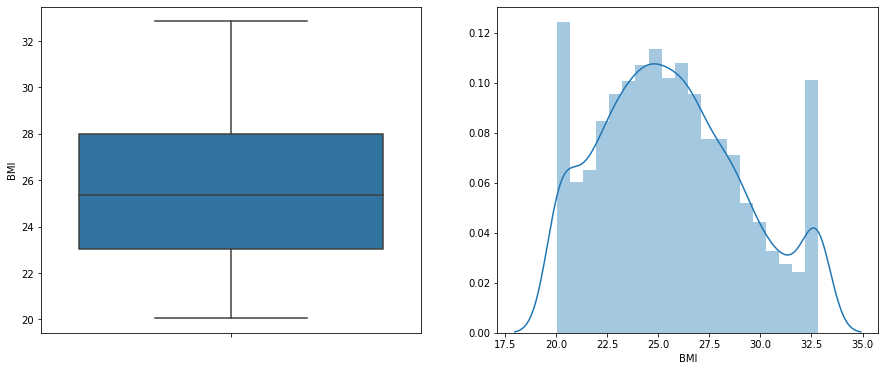

varheartRate:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


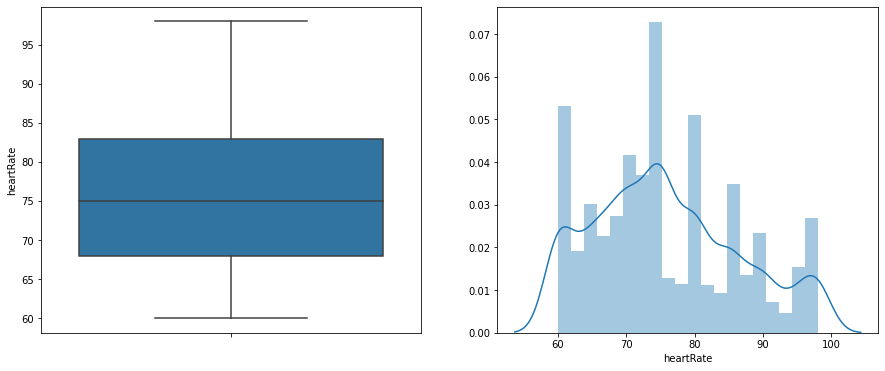

varglucose:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


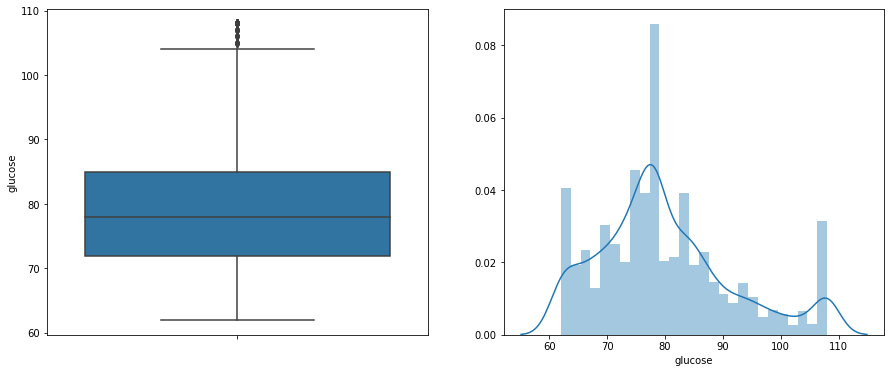

In [ ]:
for var in num_feats:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    print("var{}:{}".format(var,df_chd[var].dtype))
    fig = sns.boxplot(y=df_chd[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_chd[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
for x in num_feats[2:]:

  q3= df_chd[x].quantile(.75)
  q1 = df_chd[x].quantile(.25)
  iqr=q3-q1
  upp_lim=q3+1.5*iqr
  low_lim=q1-1.5*iqr

  df_chd.loc[(df_chd[x] > upp_lim),x] = upp_lim
  df_chd.loc[(df_chd[x] < low_lim),x] = low_lim

varid:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


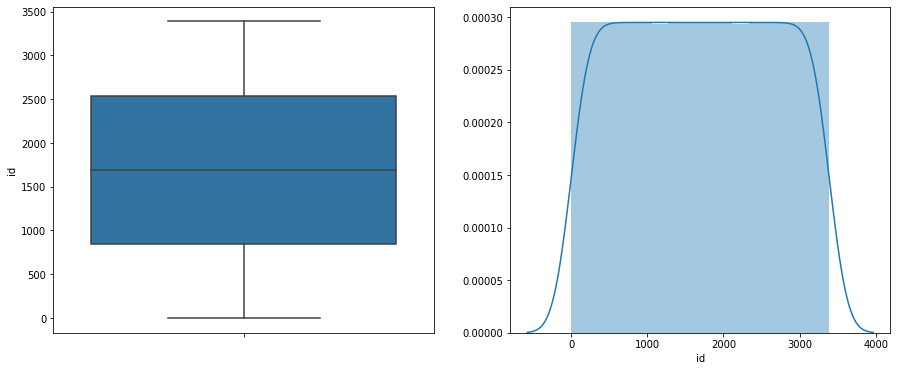

varage:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


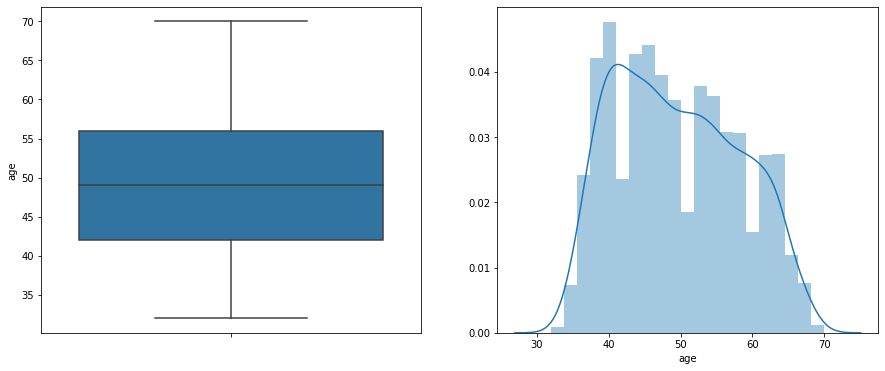

varcigsPerDay:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


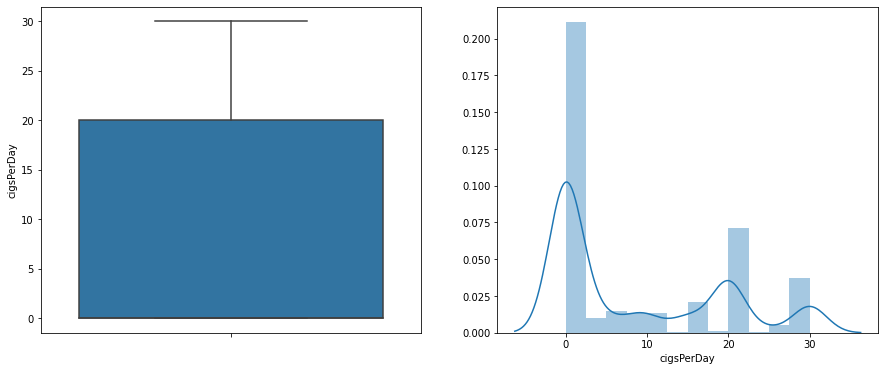

vartotChol:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


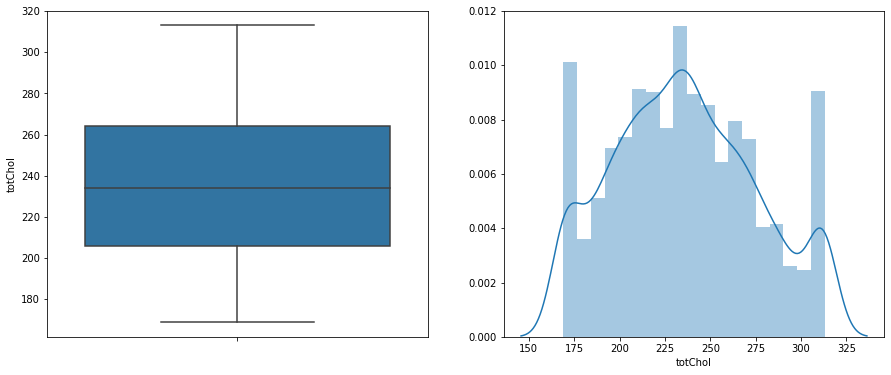

varsysBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


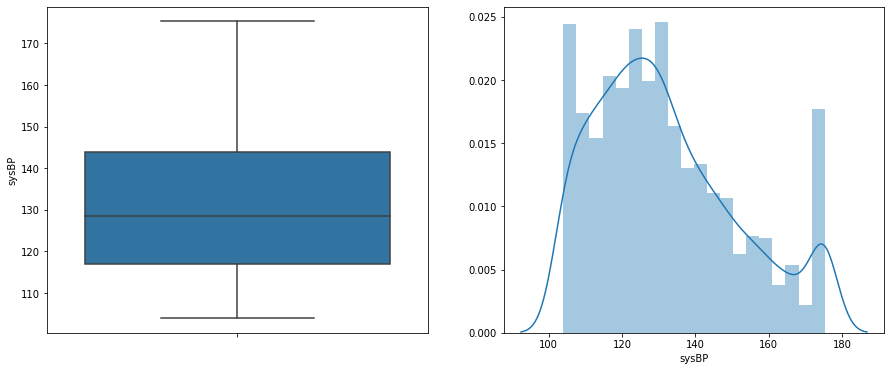

vardiaBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


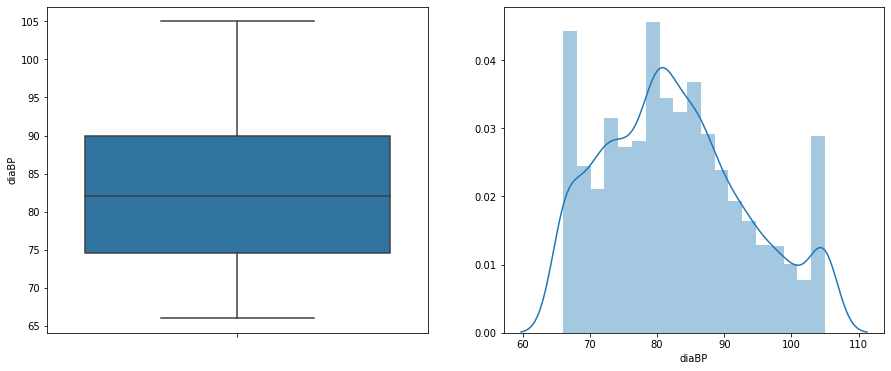

varBMI:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


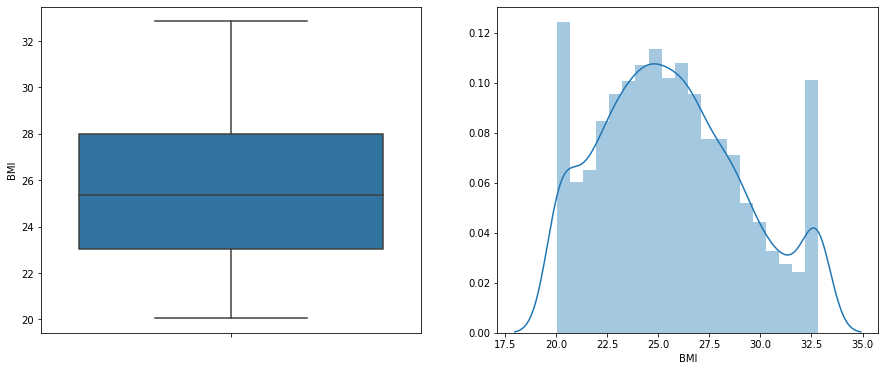

varheartRate:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


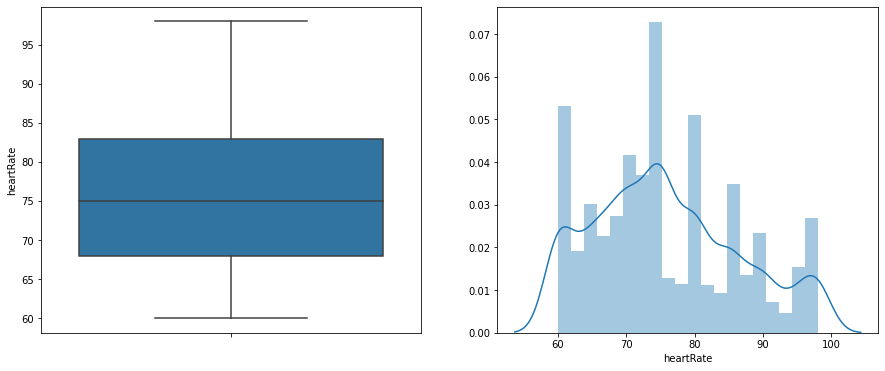

varglucose:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


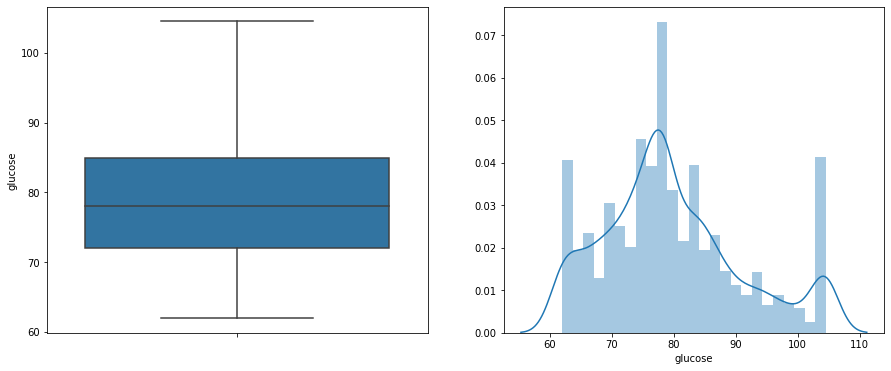

In [ ]:
for var in num_feats:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    print("var{}:{}".format(var,df_chd[var].dtype))
    fig = sns.boxplot(y=df_chd[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_chd[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
discrete_feat=df_chd[cat_feats[3:]].astype("int").columns.to_list()
discrete_feat

['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
# outlies in discrete variables
for var in discrete_feat:
    print(df_chd[var].value_counts() / np.float(len(df_chd)))
    print()

0.0    0.970501
1.0    0.029499
Name: BPMeds, dtype: float64

0    0.99351
1    0.00649
Name: prevalentStroke, dtype: float64

0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64

0    0.974336
1    0.025664
Name: diabetes, dtype: float64

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_chd[cat_feats]

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,2.0,F,YES,0.0,0,0,0,1
1,4.0,M,NO,0.0,0,1,0,0
2,1.0,F,YES,0.0,0,0,0,0
3,1.0,M,YES,0.0,0,1,0,1
4,1.0,F,YES,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
3385,1.0,F,NO,0.0,0,0,0,0
3386,1.0,F,NO,0.0,0,0,0,0
3387,3.0,M,YES,0.0,0,1,0,1
3388,1.0,M,NO,0.0,0,1,0,0


Here in categoracal variables we need to encode sex and is_smoking -encoding

In [ ]:
df_chd['sex']=df_chd['sex'].replace({"M":0,"F":1})

In [ ]:
df_chd['is_smoking']=df_chd['is_smoking'].replace({"NO":0,"YES":1})

In [ ]:
df_chd[cat_feats]

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,2.0,1,1,0.0,0,0,0,1
1,4.0,0,0,0.0,0,1,0,0
2,1.0,1,1,0.0,0,0,0,0
3,1.0,0,1,0.0,0,1,0,1
4,1.0,1,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
3385,1.0,1,0,0.0,0,0,0,0
3386,1.0,1,0,0.0,0,0,0,0
3387,3.0,0,1,0.0,0,1,0,1
3388,1.0,0,0,0.0,0,1,0,0


In [ ]:
for x in cat_feats[:]:
 print(df_chd[x].dtype)
 

float64
int64
int64
float64
object
object
object
object


In [ ]:
for x in cat_feats[4:]:
  df_chd[x]=df_chd[x].astype("int")


In [ ]:
for x in cat_feats[:]:
 print(df_chd[x].dtype)
 

float64
int64
int64
float64
int64
int64
int64
int64


In [ ]:
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
X=df_chd.loc[:,df_chd.columns[:-1]]

In [ ]:
X.shape

(3390, 16)

In [ ]:
y=df_chd['TenYearCHD']

In [ ]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
y.shape

(3390,)

In [ ]:
y.dtype

dtype('int64')

In [ ]:
df_chd.shape

(3390, 17)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_train_preds=clf.predict(x_train)

In [ ]:
y_test_preds=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
clf.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [ ]:
confusion_matrix(y_predtrain,y_train)

array([[2303,  392],
       [   9,    8]])

In [ ]:
accuracy_score(y_predtrain,y_train)

0.8521386430678466

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_preds)
print(train_accuracy)
train_accuracy = accuracy_score(y_train, y_train_preds)
print(train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_preds)
print(test_accuracy)
train_precision = precision_score(y_train, y_train_preds)
print(train_precision)
test_precision = precision_score(y_test, y_test_preds)
print(test_precision)
train_recall = recall_score(y_train, y_train_preds)
print(train_recall)
test_recall = recall_score(y_test, y_test_preds)
print(test_recall)
train_roc_auc = roc_auc_score(y_train, y_train_preds)
print(train_roc_auc)
test_roc_auc = roc_auc_score(y_test, y_test_preds)
print(test_roc_auc )

0.8521386430678466
0.8521386430678466
0.8348082595870207
0.47058823529411764
0.4
0.02
0.018018018018018018
0.5080536332179931
0.5063635063635064
